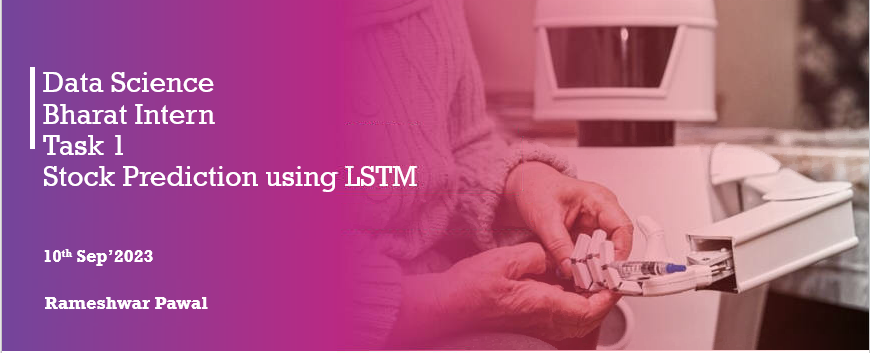

In [13]:
from IPython import display
display.Image("Task 1 Image.png")

In [14]:
#importing libraries to be used
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read csv file (NETFLIX stock price year 2018- 2022) 

In [15]:
# Data Import
df = pd.read_csv("NFLX.csv")
# first 5 results
df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


# Data Exploration & Cleaning

In [16]:
# last 5 results
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [17]:
# Data Shape
df.shape

(1009, 7)

In [18]:
# Data Describe
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [20]:
# checking all non-null values
df.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [21]:
#checking for the null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:
#Check for required columns
df = df[['Date','Open','Close']] 

# converting object dtype of date column to datetime dtype

df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) 

In [23]:
df.set_index('Date',drop=True,inplace=True) 
df.head()

,Open,Close
Date,,
2018-02-05,262.000000,254.259995
2018-02-06,247.699997,265.720001
2018-02-07,266.579987,264.559998
2018-02-08,267.079987,250.100006
2018-02-09,253.850006,249.470001


# Data Visualization

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Close'}>]], dtype=object)

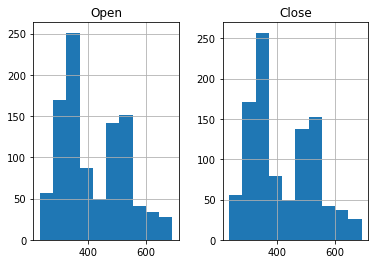

In [24]:
df.hist()

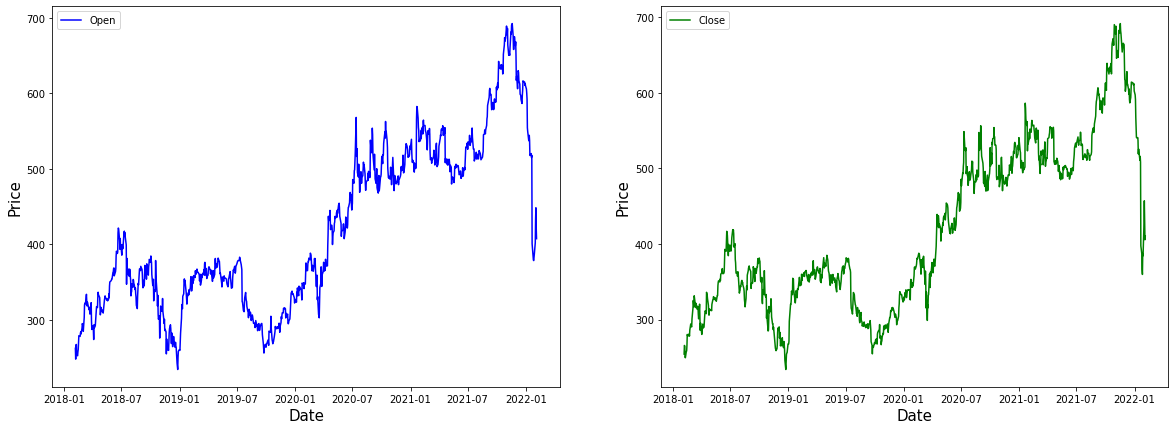

In [25]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

#  Pre Processing of the Data

In [26]:
# normalizing all the values using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2018-02-05,0.061253,0.044516
2018-02-06,0.030059,0.069548
2018-02-07,0.071243,0.067015
2018-02-08,0.072334,0.035430
2018-02-09,0.043474,0.034053
2018-02-12,0.039744,0.052576
2018-02-13,0.050978,0.053275
2018-02-14,0.057915,0.070160
2018-02-15,0.078769,0.101330


In [27]:
df.tail()

,Open,Close
Date,,
2022-01-31,0.366577,0.422140
2022-02-01,0.434178,0.487648
2022-02-02,0.467531,0.427251
2022-02-03,0.409048,0.375090
2022-02-04,0.378226,0.385072


In [28]:
# splitting the data into train and test set
# Selecting 75 % for train and 25 % for test
training_size = round(len(df) * 0.75) 

In [29]:
training_size

757

In [30]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((757, 2), (252, 2))

In [31]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [32]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((707, 50, 2), (707, 2), (202, 50, 2), (202, 2))

# CREATING LSTM MODEL

In [33]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=25))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2800      
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 2)                 52        
                                                                 
Total params: 7952 (31.06 KB)
Trainable params: 7952 (31.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
23/23 [==============================] - 6s 66ms/step - loss: 0.0316 - mean_absolute_error: 0.1337 - val_loss: 0.0526 - val_mean_absolute_error: 0.2097
Epoch 2/100
23/23 [==============================] - 1s 30ms/step - loss: 0.0055 - mean_absolute_error: 0.0581 - val_loss: 0.0169 - val_mean_absolute_error: 0.1070
Epoch 3/100
23/23 [==============================] - 1s 33ms/step - loss: 0.0033 - mean_absolute_error: 0.0446 - val_loss: 0.0090 - val_mean_absolute_error: 0.0694
Epoch 4/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0029 - mean_absolute_error: 0.0423 - val_loss: 0.0083 - val_mean_absolute_error: 0.0652
Epoch 5/100
23/23 [==============================] - 1s 34ms/step - loss: 0.0027 - mean_absolute_error: 0.0404 - val_loss: 0.0079 - val_mean_absolute_error: 0.0630
Epoch 6/100
23/23 [==============================] - 1s 33ms/step - loss: 0.0027 - mean_absolute_error: 0.0404 - val_loss: 0.0075 - val_mean_absolute_error: 0.0613
Epoch 7/100
23/2

Epoch 51/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0012 - mean_absolute_error: 0.0251 - val_loss: 0.0024 - val_mean_absolute_error: 0.0329
Epoch 52/100
23/23 [==============================] - 1s 36ms/step - loss: 0.0013 - mean_absolute_error: 0.0267 - val_loss: 0.0021 - val_mean_absolute_error: 0.0294
Epoch 53/100
23/23 [==============================] - 1s 34ms/step - loss: 0.0012 - mean_absolute_error: 0.0257 - val_loss: 0.0022 - val_mean_absolute_error: 0.0307
Epoch 54/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0012 - mean_absolute_error: 0.0250 - val_loss: 0.0031 - val_mean_absolute_error: 0.0422
Epoch 55/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0012 - mean_absolute_error: 0.0264 - val_loss: 0.0022 - val_mean_absolute_error: 0.0314
Epoch 56/100
23/23 [==============================] - 1s 37ms/step - loss: 0.0012 - mean_absolute_error: 0.0256 - val_loss: 0.0021 - val_mean_absolute_error: 0.0296
Epoch 57/1

Epoch 100/100
23/23 [==============================] - 1s 32ms/step - loss: 7.6710e-04 - mean_absolute_error: 0.0198 - val_loss: 0.0016 - val_mean_absolute_error: 0.0284


In [35]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

7/7 [==============================] - 1s 8ms/step


array([[0.67981243, 0.6721388 ],
       [0.6198594 , 0.6141775 ],
       [0.58867234, 0.58625513],
       [0.58236474, 0.58120507],
       [0.5937194 , 0.59219676]], dtype=float32)

In [36]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[545.5664 , 541.59186],
       [518.0821 , 515.0566 ],
       [503.78503, 502.27347],
       [500.89343, 499.9615 ],
       [506.09875, 504.9936 ]], dtype=float32)

# VISUALIZING ACTUAL DATA VS PREDICTED DATA

In [37]:
# Merging actual and predicted data for better visualization
df1 = pd.concat([df.iloc[-202:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-202:].index)], axis=1)

In [38]:
# Inversing normalization/scaling 
df1[['Open','Close']] = MMS.inverse_transform(df1[['Open','Close']])
df1.head()


,Open,Close,open_predicted,close_predicted
Date,,,,
2021-04-21,508.000000,508.899994,545.566406,541.591858
2021-04-22,513.820007,508.779999,518.082092,515.056580
2021-04-23,509.010010,505.549988,503.785034,502.273468
2021-04-26,506.760010,510.299988,500.893433,499.961487
2021-04-27,512.619995,505.549988,506.098755,504.993591


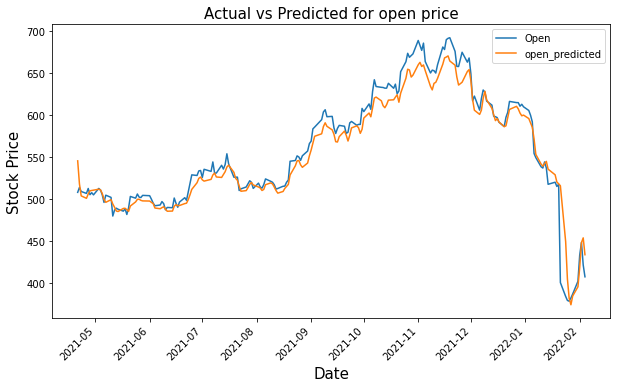

In [39]:
# plotting the actual open and predicted open prices on date index
df1[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

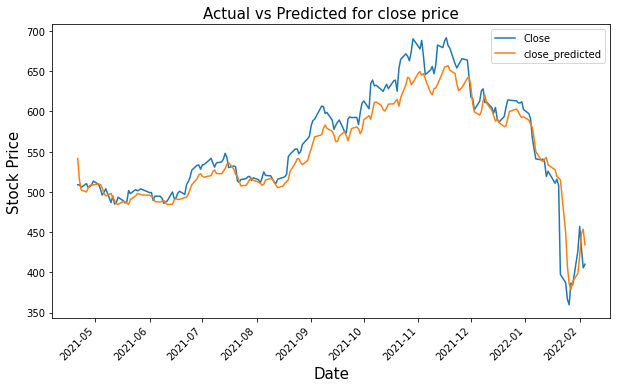

In [40]:
# plotting the actual close and predicted close prices on date index 
df1[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

# Predicting forthcoming prediction

In [41]:
df1

,Open,Close,open_predicted,close_predicted
Date,,,,
2021-04-21,508.000000,508.899994,545.566406,541.591858
2021-04-22,513.820007,508.779999,518.082092,515.056580
2021-04-23,509.010010,505.549988,503.785034,502.273468
2021-04-26,506.760010,510.299988,500.893433,499.961487
2021-04-27,512.619995,505.549988,506.098755,504.993591
...,...,...,...,...
2022-01-31,401.970001,427.140015,395.425659,398.708740
2022-02-01,432.959991,457.130005,418.253357,420.382507
2022-02-02,448.250000,429.480011,448.042572,448.509796


In [42]:
# Creating a dataframe and adding 10 days to existing index 

df2 = pd.concat([df1,pd.DataFrame(columns=df1.columns,
                                        index=pd.date_range(start=df1.index[-1], periods=11, freq='D'))],axis=0)
df2['2022-02-03':'2022-02-21']

,Open,Close,open_predicted,close_predicted
2022-02-03,421.440002,405.600006,453.727753,453.490601
2022-02-04,407.309998,410.170013,433.646179,434.089661
2022-02-04,NaN,NaN,NaN,NaN
2022-02-05,NaN,NaN,NaN,NaN
2022-02-06,NaN,NaN,NaN,NaN
2022-02-07,NaN,NaN,NaN,NaN
2022-02-08,NaN,NaN,NaN,NaN
2022-02-09,NaN,NaN,NaN,NaN
2022-02-10,NaN,NaN,NaN,NaN
2022-02-11,NaN,NaN,NaN,NaN


In [43]:
# creating a DataFrame and filling values of open and close column
forthcoming_prediction = pd.DataFrame(columns=['open','close'],index=df1.index)
forthcoming_prediction.index=pd.to_datetime(forthcoming_prediction.index)

In [44]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  forthcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 23ms/step


In [45]:
# inversing Normalization/scaling
forthcoming_prediction[['open','close']] = MMS.inverse_transform(forthcoming_prediction[['open','close']])

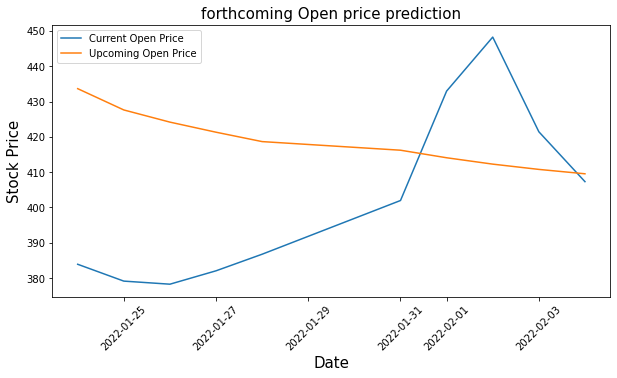

In [46]:
# plotting forthcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Open'],label='Current Open Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming Open price prediction',size=15)
ax.legend()
fig.show()

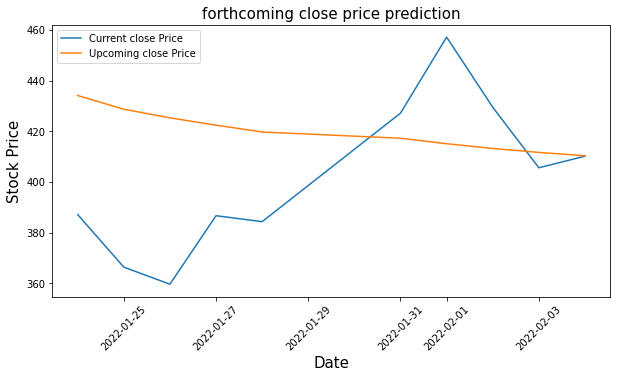

In [47]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Close'],label='Current close Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming close price prediction',size=15)
ax.legend()
fig.show()